In [1]:
%load_ext autoreload
%autoreload 2

# Load results

In [2]:
import pandas as pd
import pathlib

import pickle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [3]:
output_dir = f'results/results-overall-drift-datasets-noise-0.1'

In [4]:
for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:

    
    filename = f"{output_dir}/{exp_type}_drift_results_overall.pkl"
    if not pathlib.Path(filename).exists():
        print(f"File {filename} not found")
        continue
    
    with open(filename, "rb") as f:
        overall_drift_results = pickle.load(f)

    threshold = 0


    res = []
    for method in overall_drift_results:
        overall_drift_result = overall_drift_results[method]
        # overall_drift_result[i]['drift'] is 1 if the experiment i has drift, 0 otherwise. We use this as the ground truth
        # Half of the experiments have drift, half do not
        gt = [overall_drift_result[i]['drift'] for i in range(len(overall_drift_result))]
        
        # Predictions are the number of drift points detected by the method
        predictions = [overall_drift_result[i]['num_pts_detected'] for i in range(len(overall_drift_result))]
        
        
        # We say that drift is detected if the number of drift points detected is greater than a threshold
        predictions = list([pred > threshold for pred in predictions])
        #Convert to int predictions
        predictions=list(map(int, predictions))


        acc = accuracy_score(gt, predictions)

        f1 = f1_score(gt, predictions, average='macro')

        tn, fp, fn, tp = confusion_matrix(gt, predictions).ravel()

        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)

        res.append([method, acc, f1, fpr, fnr])

    res = pd.DataFrame(res, columns=["method", "accuracy", "f1", "fpr", "fnr"])
    print(exp_type)
    display(res)

agrawal


,method,accuracy,f1,fpr,fnr
0,hddma_0.0001,1.00,1.000000,0.00,0.00
1,hddma_0.0002,1.00,1.000000,0.00,0.00
2,hddma_0.001,1.00,1.000000,0.00,0.00
3,hddma_0.002,0.99,0.989999,0.02,0.00
4,hddma_0.01,0.95,0.949875,0.10,0.00
5,hddma_0.02,0.93,0.929655,0.14,0.00
6,ddm_5,0.96,0.959936,0.08,0.00
7,ddm_10,0.97,0.969973,0.06,0.00
8,ddm_30,0.97,0.969973,0.06,0.00
9,ddm_50,0.96,0.959936,0.08,0.00


sea


,method,accuracy,f1,fpr,fnr
0,hddma_0.0001,0.50,0.333333,0.00,1.00
1,hddma_0.0002,0.50,0.333333,0.00,1.00
2,hddma_0.001,0.48,0.324324,0.04,1.00
3,hddma_0.002,0.48,0.324324,0.04,1.00
4,hddma_0.01,0.48,0.368626,0.10,0.94
5,hddma_0.02,0.49,0.409107,0.14,0.88
6,ddm_5,0.52,0.376299,0.00,0.96
7,ddm_10,0.52,0.376299,0.00,0.96
8,ddm_30,0.52,0.376299,0.00,0.96
9,ddm_50,0.51,0.355178,0.00,0.98


led


,method,accuracy,f1,fpr,fnr
0,hddma_0.0001,0.50,0.333333,0.00,1.00
1,hddma_0.0002,0.51,0.355178,0.00,0.98
2,hddma_0.001,0.50,0.350312,0.02,0.98
3,hddma_0.002,0.51,0.371069,0.02,0.96
4,hddma_0.01,0.47,0.405229,0.20,0.86
5,hddma_0.02,0.42,0.395833,0.38,0.78
6,ddm_5,0.47,0.319728,0.06,1.00
7,ddm_10,0.47,0.319728,0.06,1.00
8,ddm_30,0.47,0.319728,0.06,1.00
9,ddm_50,0.47,0.319728,0.06,1.00


hyper


,method,accuracy,f1,fpr,fnr
0,hddma_0.0001,0.69,0.657042,0.00,0.62
1,hddma_0.0002,0.71,0.683372,0.00,0.58
2,hddma_0.001,0.78,0.768810,0.00,0.44
3,hddma_0.002,0.77,0.757153,0.00,0.46
4,hddma_0.01,0.74,0.737374,0.16,0.36
5,hddma_0.02,0.68,0.677939,0.40,0.24
6,ddm_5,0.73,0.708769,0.00,0.54
7,ddm_10,0.73,0.708769,0.00,0.54
8,ddm_30,0.74,0.721150,0.00,0.52
9,ddm_50,0.74,0.721150,0.00,0.52


stagger


,method,accuracy,f1,fpr,fnr
0,hddma_0.0001,1.00,1.000000,0.0,0.00
1,hddma_0.0002,1.00,1.000000,0.0,0.00
2,hddma_0.001,1.00,1.000000,0.0,0.00
3,hddma_0.002,1.00,1.000000,0.0,0.00
4,hddma_0.01,1.00,1.000000,0.0,0.00
5,hddma_0.02,1.00,1.000000,0.0,0.00
6,ddm_5,1.00,1.000000,0.0,0.00
7,ddm_10,1.00,1.000000,0.0,0.00
8,ddm_30,1.00,1.000000,0.0,0.00
9,ddm_50,1.00,1.000000,0.0,0.00


# Load the result and plot them

In [5]:
res_dataset_method_noise = {}

for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    res_dataset_method_noise[exp_type] = {}
    for noise in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
        output_dir = f'results/results-overall-drift-datasets-noise-{noise}'
        
        filename = f"{output_dir}/{exp_type}_drift_results_overall.pkl"
        if not pathlib.Path(filename).exists():
            print(f"File {filename} not found")
            continue

        with open(filename, "rb") as f:
            overall_drift_results = pickle.load(f)
        
        threshold = 0


        res = {}
        for method in overall_drift_results:

            overall_drift_result = overall_drift_results[method]
            # overall_drift_result[i]['drift'] is 1 if the experiment i has drift, 0 otherwise. We use this as the ground truth
            # Half of the experiments have drift, half do not
            gt = [overall_drift_result[i]['drift'] for i in range(len(overall_drift_result))]
            
            # Predictions are the number of drift points detected by the method
            predictions = [overall_drift_result[i]['num_pts_detected'] for i in range(len(overall_drift_result))]
            
            
            # We say that drift is detected if the number of drift points detected is greater than a threshold
            predictions = list([pred > threshold for pred in predictions])
            #Convert to int predictions
            predictions=list(map(int, predictions))


            acc = accuracy_score(gt, predictions)

            f1 = f1_score(gt, predictions)

            tn, fp, fn, tp = confusion_matrix(gt, predictions).ravel()

            fpr = fp / (fp + tn)
            fnr = fn / (fn + tp)

            res[method] = f1
            if method not in res_dataset_method_noise[exp_type]:
                res_dataset_method_noise[exp_type][method] = {'acc': {}, 'f1': {}, 'fpr': {}, 'fnr': {}}
            res_dataset_method_noise[exp_type][method]['acc'][noise] = acc
            res_dataset_method_noise[exp_type][method]['f1'][noise] = f1
            res_dataset_method_noise[exp_type][method]['fpr'][noise] = fpr
            res_dataset_method_noise[exp_type][method]['fnr'][noise] = fnr

## Plot

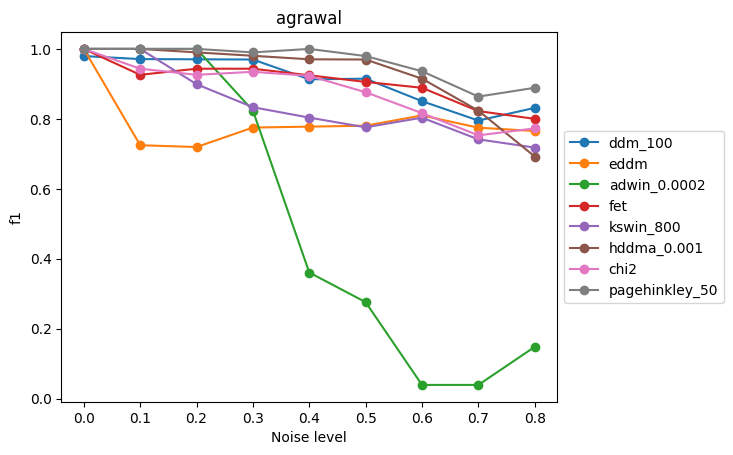

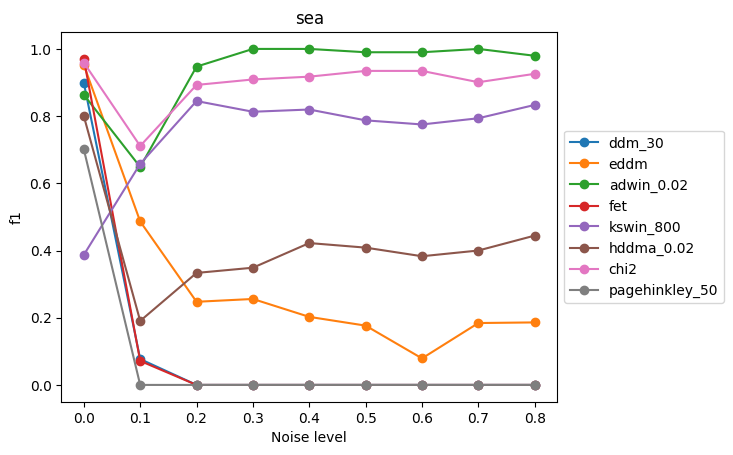

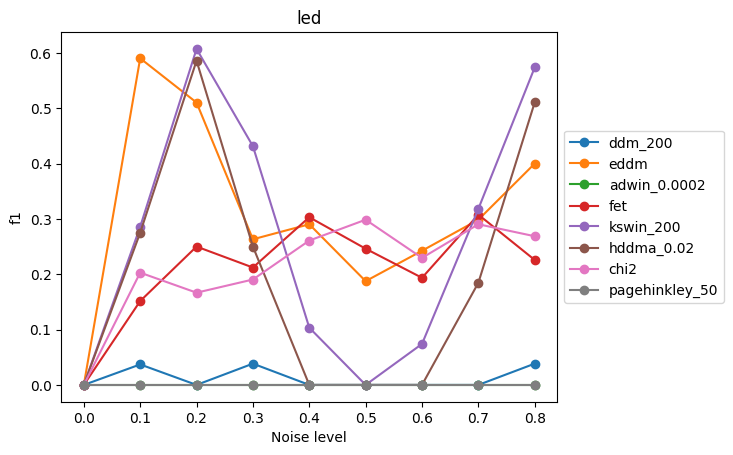

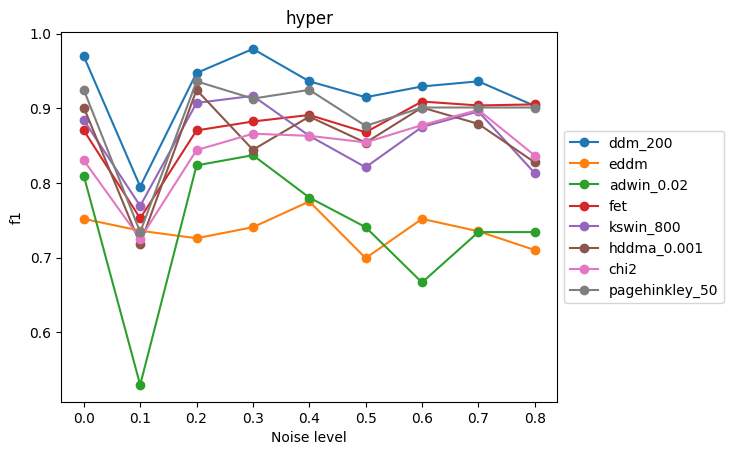

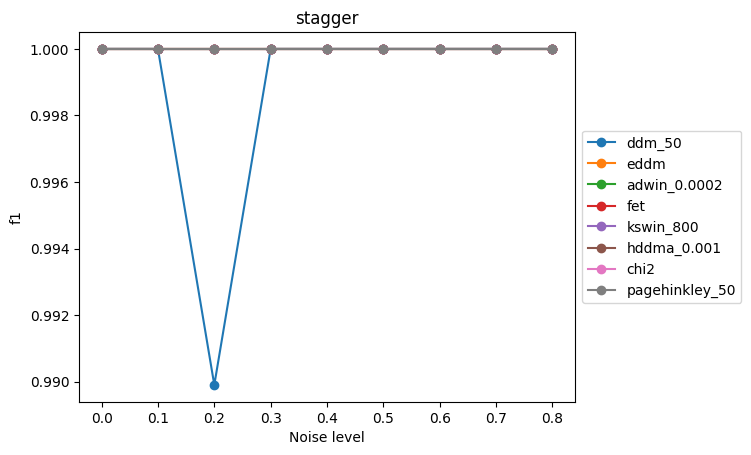

In [6]:
metric = 'f1'
for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    
    # Select the best method for each dataset
    noise = 0.1

    result_dataset_i = res_dataset_method_noise[exp_type]
    methods = set(result_dataset_i.keys())
    base_methods = set([method.split('_')[0] for method in result_dataset_i])

    # Take the configuration of the base method with the highest f1 score
    best_methods = []
    for base_method in base_methods:
        scores = {method: result_dataset_i[method][metric][noise] for method in methods if method.split('_')[0]==base_method}
        # get the method with the highest f1 score
        best_methods.append(max(scores, key=scores.get))


    for method in best_methods:
        best_method_values = res_dataset_method_noise[exp_type][method][metric]

        noise_levels = list(best_method_values.keys())
        vals = list(best_method_values.values())

        import matplotlib.pyplot as plt
        plt.plot(noise_levels, vals, label = method, marker='o')    
        plt.xlabel('Noise level')
        plt.ylabel(f'{metric}')
        plt.title(f'{exp_type}')
        # Show the legend outside the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [23]:
## Best results for a given noise

In [7]:
metric = 'f1'
dataset_method_rankings = {}
for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    dataset_method_rankings[exp_type] = {}
    # Select the best method for each dataset
    noise = 0.1

    result_dataset_i = res_dataset_method_noise[exp_type]
    methods = set(result_dataset_i.keys())
    base_methods = set([method.split('_')[0] for method in result_dataset_i])

    # Take the configuration of the base method with the highest f1 score
    best_methods = []
    for base_method in base_methods:
        scores = {method: result_dataset_i[method][metric][noise] for method in methods if method.split('_')[0]==base_method}
        # get the method with the highest f1 score
        best_methods.append(max(scores, key=scores.get))
        # Sort the scores by value
        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

        # Add a column with the rank
        rank = [i+1 for i in range(len(sorted_scores))]
        sorted_scores = [(method, score, rank) for (method, score), rank in zip(sorted_scores, rank)]
        sorted_scores
        dataset_method_rankings[exp_type][base_method] = sorted_scores

In [8]:

for base_method in base_methods:
    print(base_method)
    df_all = None
    for exp_type in dataset_method_rankings:
        vals = dataset_method_rankings[exp_type][base_method]
        df = pd.DataFrame(vals, columns=['method', f'{metric}_{exp_type}', exp_type])
        df.set_index('method', inplace=True)
        if df_all is None:
            df_all = df
        else:
            df_all = df_all.join(df)
    display(df_all)

ddm


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
ddm_100,0.970874,1,0.074074,5,0.000000,3,0.750000,2,1.0,2
ddm_30,0.970874,2,0.076923,1,0.000000,4,0.648649,4,1.0,3
ddm_200,0.970874,3,0.075472,4,0.037037,1,0.795181,1,1.0,5
ddm_10,0.970874,4,0.076923,3,0.000000,6,0.630137,6,1.0,6
ddm_50,0.961538,5,0.039216,6,0.000000,2,0.648649,3,1.0,1
ddm_5,0.961538,6,0.076923,2,0.000000,5,0.630137,5,1.0,4


eddm


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
eddm,0.724638,1,0.486486,1,0.590164,1,0.736,1,1.0,1


adwin


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
adwin_0.0002,1.0,1,0.360656,5,0.0,1,0.039216,5,1.0,1
adwin_0.0001,1.0,2,0.305085,6,0.0,2,0.039216,6,1.0,2
adwin_0.001,1.0,3,0.461538,3,0.0,3,0.148148,4,1.0,3
adwin_0.01,1.0,4,0.630137,2,0.0,4,0.387097,2,1.0,4
adwin_0.002,1.0,5,0.461538,4,0.0,5,0.214286,3,1.0,5
adwin_0.02,1.0,6,0.648649,1,0.0,6,0.529412,1,1.0,6


fet


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
fet,0.925926,1,0.071429,1,0.151515,1,0.752688,1,1.0,1


kswin


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
kswin_800,1.000000,1,0.657895,1,0.067797,8,0.769231,1,1.000000,1
kswin_500,1.000000,2,0.388060,4,0.034483,9,0.615385,7,1.000000,2
kswin_300,1.000000,3,0.148148,6,0.135593,5,0.615385,8,1.000000,3
kswin_700,1.000000,4,0.613333,2,0.101695,7,0.752688,2,1.000000,5
kswin_400,1.000000,5,0.181818,5,0.200000,4,0.606742,9,1.000000,6
kswin_600,1.000000,6,0.527778,3,0.129032,6,0.719101,3,1.000000,7
kswin_200,0.990099,7,0.103448,7,0.285714,1,0.646465,5,1.000000,4
kswin_100,0.951456,8,0.098361,8,0.285714,2,0.702703,4,0.989899,8
kswin_50,0.869565,9,0.032787,9,0.225352,3,0.622642,6,0.924731,9


hddma


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
hddma_0.001,1.000000,1,0.000000,3,0.038462,5,0.717949,1,1.0,1
hddma_0.0002,1.000000,2,0.000000,5,0.039216,4,0.591549,5,1.0,5
hddma_0.0001,1.000000,3,0.000000,6,0.000000,6,0.550725,6,1.0,6
hddma_0.002,0.990099,4,0.000000,4,0.075472,3,0.701299,4,1.0,3
hddma_0.01,0.952381,5,0.103448,2,0.208955,2,0.711111,2,1.0,4
hddma_0.02,0.934579,6,0.190476,1,0.275000,1,0.703704,3,1.0,2


chi2


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
chi2,0.943396,1,0.711111,1,0.202899,1,0.725275,1,1.0,1


pagehinkley


,f1_agrawal,agrawal,f1_sea,sea,f1_led,led,f1_hyper,hyper,f1_stagger,stagger
method,,,,,,,,,,
pagehinkley_50,1.0,1,0.0,1,0.0,1,0.734177,1,1.0,1
pagehinkley_10,1.0,2,0.0,2,0.0,2,0.734177,2,1.0,2
pagehinkley_5,1.0,3,0.0,3,0.0,3,0.734177,3,1.0,3
pagehinkley_200,1.0,4,0.0,4,0.0,4,0.734177,4,1.0,4
pagehinkley_100,1.0,5,0.0,5,0.0,5,0.734177,5,1.0,5
pagehinkley_30,1.0,6,0.0,6,0.0,6,0.734177,6,1.0,6


In [9]:
overall_best_methods = ["chi2", "pagehinkley_100", "kswin_700", "eddm", "hddma_0.001", "fet", "adwin_0.01", "ddm_200"]

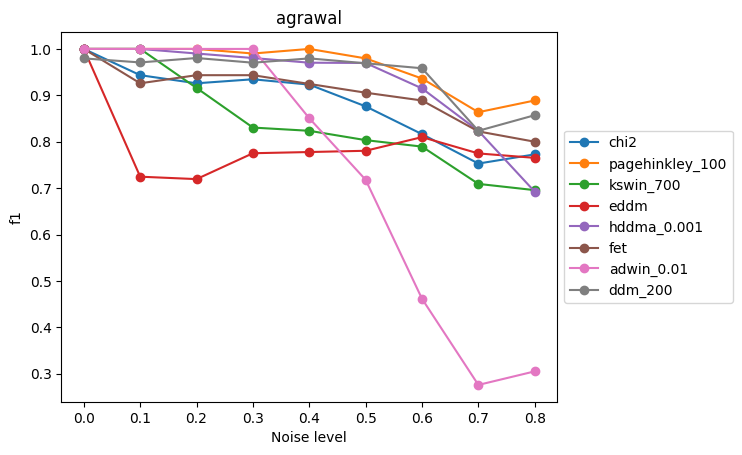

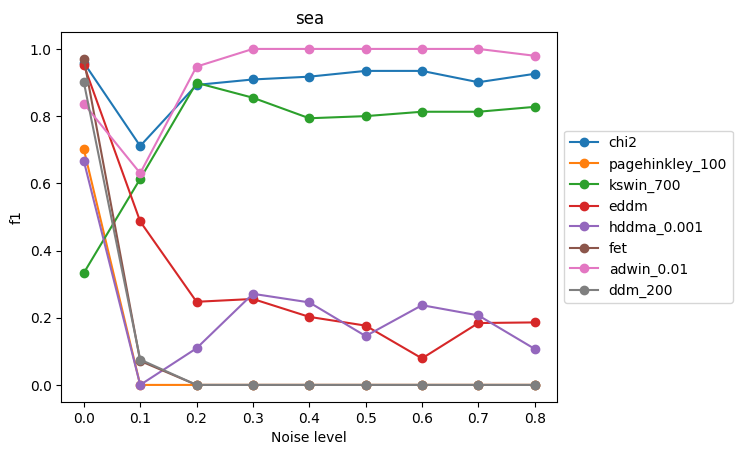

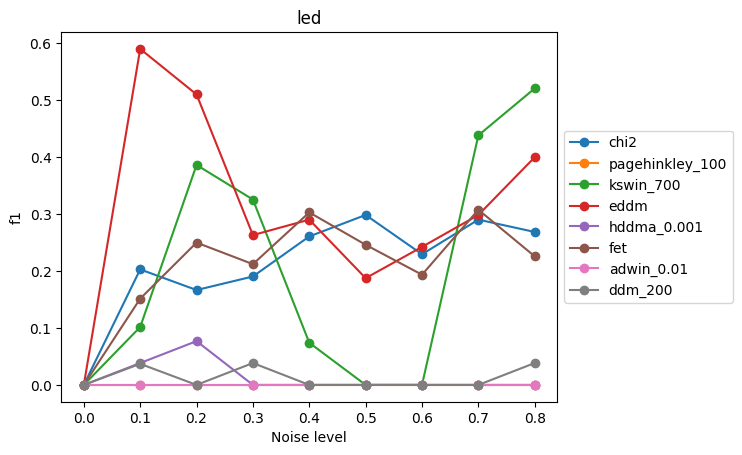

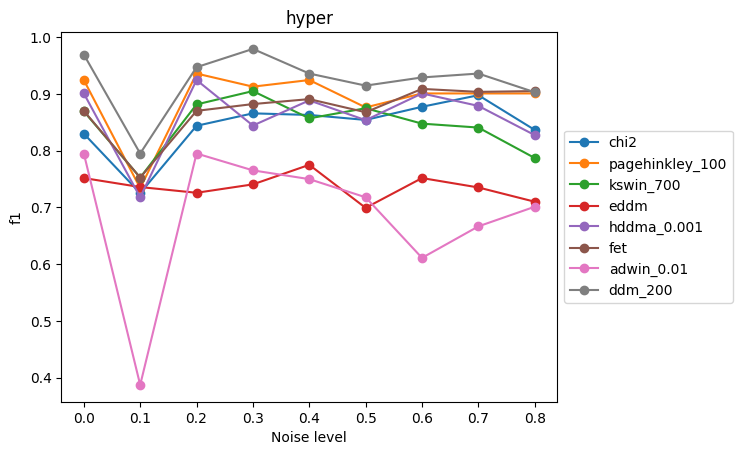

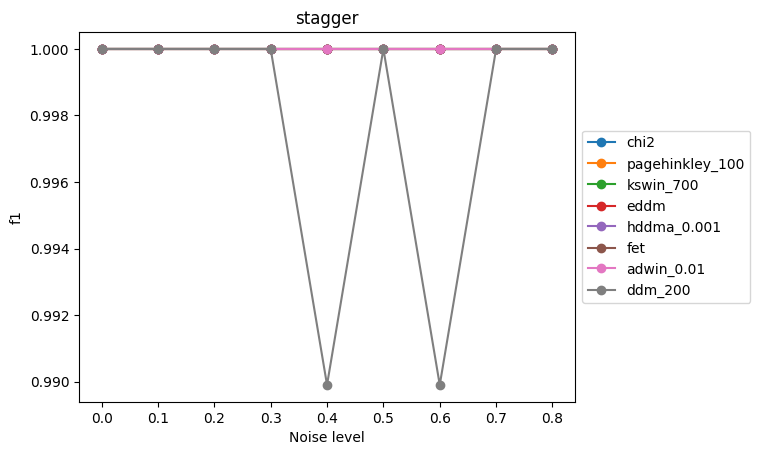

In [10]:
metric = 'f1'

for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:

    for method in overall_best_methods:
        best_method_values = res_dataset_method_noise[exp_type][method][metric]

        noise_levels = list(best_method_values.keys())
        vals = list(best_method_values.values())

        import matplotlib.pyplot as plt
        plt.plot(noise_levels, vals, label = method, marker='o')    
        plt.xlabel('Noise level')
        plt.ylabel(f'{metric}')
        plt.title(f'{exp_type}')
        # Show the legend outside the plot
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [11]:
metric = 'f1'

store_best_results = {}
for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    store_best_results[exp_type] = {}
    for method in overall_best_methods:
        best_method_values = res_dataset_method_noise[exp_type][method][metric]
        store_best_results[exp_type][method] = best_method_values
    display(pd.DataFrame(store_best_results[exp_type]))

# Store results
import pickle
# Create folder if it does not exist
pathlib.Path('summary_results').mkdir(parents=True, exist_ok=True)
with open(f'summary_results/results-overall-best-methods-{metric}-noise.pkl', 'wb') as f:
    pickle.dump(store_best_results, f)

,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.979592
0.1,0.943396,1.000000,1.000000,0.724638,1.000000,0.925926,1.000000,0.970874
0.2,0.925926,1.000000,0.915888,0.719424,0.990099,0.943396,1.000000,0.980392
0.3,0.934579,0.990099,0.830508,0.775194,0.980392,0.943396,1.000000,0.970297
0.4,0.923077,1.000000,0.823529,0.777778,0.970297,0.924528,0.850575,0.979592
0.5,0.876190,0.979592,0.803419,0.780488,0.969697,0.905660,0.717949,0.969072
0.6,0.816327,0.936170,0.789474,0.809917,0.914894,0.888889,0.461538,0.958333
0.7,0.752941,0.863636,0.709091,0.774775,0.823529,0.822222,0.275862,0.823529
0.8,0.772727,0.888889,0.695652,0.765217,0.692308,0.800000,0.305085,0.857143


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.959184,0.701299,0.333333,0.952381,0.666667,0.970297,0.837209,0.900901
0.1,0.711111,0.000000,0.613333,0.486486,0.000000,0.071429,0.630137,0.075472
0.2,0.892857,0.000000,0.899083,0.247423,0.109091,0.000000,0.947368,0.000000
0.3,0.909091,0.000000,0.854701,0.255814,0.271186,0.000000,1.000000,0.000000
0.4,0.917431,0.000000,0.793651,0.202532,0.245614,0.000000,1.000000,0.000000
0.5,0.934579,0.000000,0.800000,0.176471,0.145455,0.000000,1.000000,0.000000
0.6,0.934579,0.000000,0.813008,0.078947,0.237288,0.000000,1.000000,0.000000
0.7,0.900901,0.000000,0.813008,0.184211,0.206897,0.000000,1.000000,0.000000
0.8,0.925926,0.000000,0.827586,0.186047,0.107143,0.000000,0.979592,0.000000


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
0.1,0.202899,0.0,0.101695,0.590164,0.038462,0.151515,0.0,0.037037
0.2,0.166667,0.0,0.386364,0.510204,0.076923,0.250000,0.0,0.000000
0.3,0.190476,0.0,0.325581,0.263158,0.000000,0.212121,0.0,0.038462
0.4,0.260870,0.0,0.074074,0.290323,0.000000,0.303030,0.0,0.000000
0.5,0.298507,0.0,0.000000,0.187500,0.000000,0.246154,0.0,0.000000
0.6,0.229508,0.0,0.000000,0.242424,0.000000,0.193548,0.0,0.000000
0.7,0.290323,0.0,0.438356,0.298507,0.000000,0.307692,0.0,0.000000
0.8,0.268657,0.0,0.520833,0.400000,0.000000,0.225806,0.0,0.038462


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.830189,0.924731,0.869565,0.751880,0.901099,0.870370,0.795181,0.969697
0.1,0.725275,0.734177,0.752688,0.736000,0.717949,0.752688,0.387097,0.795181
0.2,0.844037,0.936170,0.881720,0.725926,0.924731,0.870370,0.795181,0.947368
0.3,0.865979,0.913043,0.905263,0.740741,0.844444,0.882353,0.765432,0.979592
0.4,0.863158,0.924731,0.857143,0.775194,0.888889,0.891089,0.750000,0.936170
0.5,0.854369,0.876404,0.875000,0.699301,0.853933,0.867925,0.717949,0.914894
0.6,0.877551,0.901099,0.847826,0.751880,0.901099,0.909091,0.611111,0.929293
0.7,0.897959,0.901099,0.840909,0.735294,0.879121,0.903846,0.666667,0.936170
0.8,0.836735,0.901099,0.787234,0.710145,0.827586,0.905263,0.701299,0.903226


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.989899
0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.989899
0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


# Show average

In [29]:
metric = 'f1'
avg_results = {}    
for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    avg_results[exp_type] = {}
    for method in res_dataset_method_noise[exp_type]:
        import numpy as np
        avg_results[exp_type][method] = np.array(list(res_dataset_method_noise[exp_type][method][metric].values())).mean()

df_avg_results_all = pd.DataFrame(avg_results)

df_avg_results_all.sort_index()

,agrawal,sea,led,hyper,stagger
adwin_0.0001,0.641779,0.899973,0.333333,0.564997,1.000000
adwin_0.0002,0.667059,0.909643,0.333333,0.588115,1.000000
adwin_0.001,0.707976,0.923753,0.333333,0.668824,1.000000
adwin_0.002,0.729664,0.927325,0.333333,0.694963,1.000000
adwin_0.01,0.803879,0.943982,0.332836,0.782940,1.000000
adwin_0.02,0.841888,0.945473,0.331842,0.808559,1.000000
chi2,0.886738,0.894590,0.425402,0.855184,1.000000
ddm_10,0.839247,0.385227,0.329316,0.862098,0.998889
ddm_100,0.918891,0.394458,0.330705,0.917325,0.998889
ddm_200,0.947260,0.396232,0.335900,0.944297,0.997778


# Load summary results

In [30]:
import pandas as pd
import pickle

In [31]:
metric = 'f1'
with open(f'summary_results/results-overall-best-methods-{metric}-noise.pkl', 'rb') as f:
    store_best_results = pickle.load(f)

In [32]:
for dataset in store_best_results:
    print(dataset)
    display(pd.DataFrame(store_best_results[dataset]))

agrawal


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.979992
0.1,0.939783,1.000000,1.000000,0.555867,1.000000,0.919485,1.000000,0.969973
0.2,0.919485,1.000000,0.909557,0.540040,0.989999,0.939783,1.000000,0.979992
0.3,0.929655,0.989999,0.793303,0.683372,0.979992,0.939783,1.000000,0.969997
0.4,0.919872,1.000000,0.782135,0.699700,0.969997,0.919711,0.867765,0.979992
0.5,0.869674,0.979992,0.763155,0.714919,0.969997,0.899639,0.768810,0.969973
0.6,0.819928,0.939783,0.755202,0.759389,0.919711,0.889989,0.601140,0.959936
0.7,0.785166,0.878247,0.676768,0.746938,0.846547,0.838384,0.490044,0.846547
0.8,0.797078,0.898990,0.641944,0.723785,0.747793,0.809524,0.507152,0.868938


sea


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.959984,0.757153,0.523810,0.949875,0.733333,0.969997,0.857201,0.888653
0.1,0.737374,0.333333,0.690667,0.423019,0.324324,0.355159,0.708769,0.371069
0.2,0.878247,0.333333,0.889102,0.269342,0.385580,0.280576,0.949875,0.333333
0.3,0.898990,0.333333,0.824941,0.347205,0.483111,0.295775,1.000000,0.324324
0.4,0.909265,0.333333,0.721150,0.340935,0.472457,0.295775,1.000000,0.328859
0.5,0.929655,0.333333,0.733333,0.376114,0.410658,0.290780,1.000000,0.328859
0.6,0.929655,0.333333,0.757153,0.257216,0.459070,0.290780,1.000000,0.333333
0.7,0.888653,0.333333,0.757153,0.342105,0.441476,0.280576,1.000000,0.333333
0.8,0.919485,0.328859,0.794745,0.286006,0.379960,0.295775,0.979992,0.324324


led


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
0.1,0.391526,0.333333,0.362904,0.474569,0.350312,0.366802,0.328859,0.340436
0.2,0.404762,0.333333,0.452110,0.519808,0.376299,0.448529,0.333333,0.328859
0.3,0.409107,0.333333,0.408405,0.405772,0.333333,0.412031,0.333333,0.350312
0.4,0.435778,0.333333,0.365804,0.485741,0.333333,0.479873,0.333333,0.324324
0.5,0.472562,0.333333,0.333333,0.402574,0.333333,0.441595,0.333333,0.333333
0.6,0.445689,0.333333,0.333333,0.434645,0.333333,0.415615,0.333333,0.333333
0.7,0.485741,0.333333,0.557761,0.472562,0.333333,0.487179,0.333333,0.328859
0.8,0.450118,0.333333,0.539263,0.454545,0.328859,0.438990,0.333333,0.350312


hyper


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.819350,0.929655,0.879227,0.629671,0.909265,0.859098,0.824941,0.969997
0.1,0.839422,0.929655,0.929655,0.670330,0.919485,0.849261,0.846547,0.959984
0.2,0.828612,0.939783,0.889458,0.578348,0.929655,0.859098,0.824941,0.949875
0.3,0.869883,0.919485,0.909774,0.601140,0.858586,0.879952,0.802884,0.979992
0.4,0.869674,0.929655,0.868938,0.683372,0.898990,0.889989,0.791667,0.939783
0.5,0.849865,0.888653,0.879808,0.472457,0.868408,0.859494,0.768810,0.919711
0.6,0.879952,0.909265,0.859098,0.629671,0.909265,0.909991,0.696181,0.929993
0.7,0.899960,0.909265,0.857955,0.586397,0.889102,0.899840,0.733333,0.939783
0.8,0.839936,0.909265,0.799277,0.532492,0.847421,0.909774,0.757153,0.909557


stagger


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.989999
0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.989999
0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


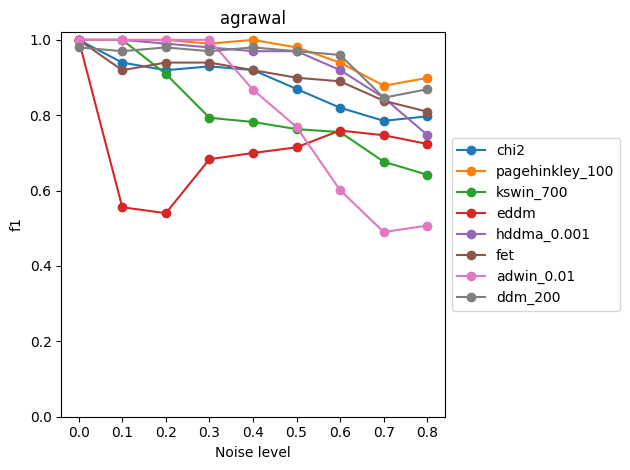

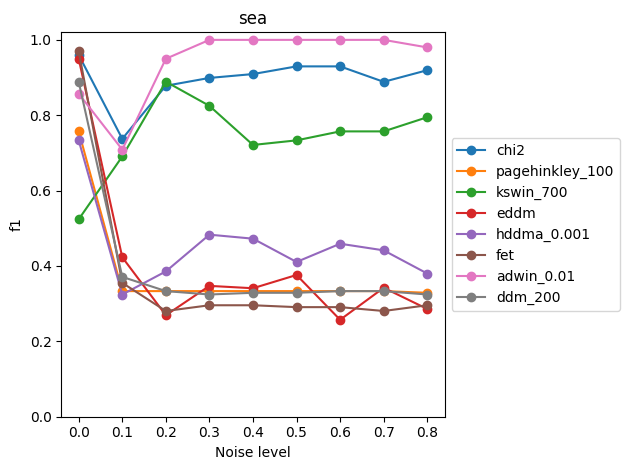

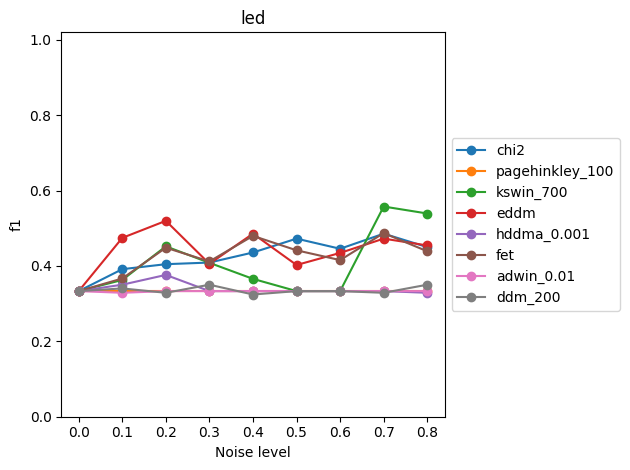

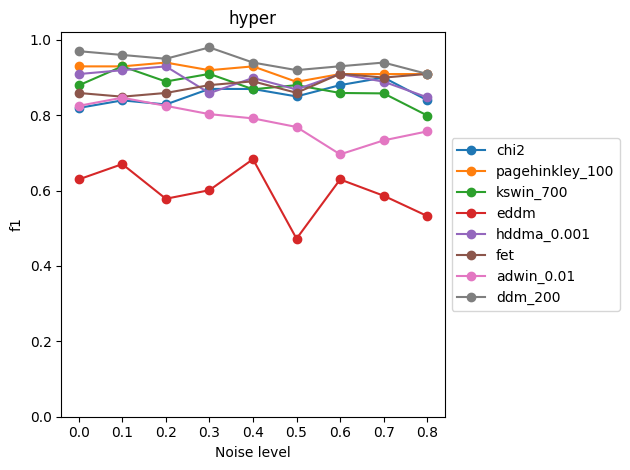

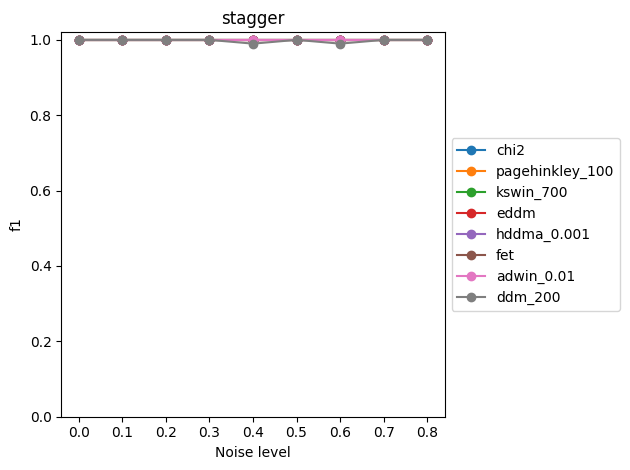

In [33]:
for dataset in store_best_results:
    for method in store_best_results[dataset]:
        noise_vs_values = store_best_results[dataset][method]

        noise_levels = list(noise_vs_values.keys())
        vals = list(noise_vs_values.values())

        import matplotlib.pyplot as plt
        plt.plot(noise_levels, vals, label = method, marker='o')    
        plt.xlabel('Noise level')
        plt.ylabel(f'{metric}')
        plt.title(f'{dataset}')
        plt.ylim(0, 1+0.02)
        # Show the legend outside the plot
        plt.tight_layout()
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [34]:
for dataset in store_best_results:
    print(dataset)
    display(pd.DataFrame(store_best_results[dataset]))

agrawal


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.979992
0.1,0.939783,1.000000,1.000000,0.555867,1.000000,0.919485,1.000000,0.969973
0.2,0.919485,1.000000,0.909557,0.540040,0.989999,0.939783,1.000000,0.979992
0.3,0.929655,0.989999,0.793303,0.683372,0.979992,0.939783,1.000000,0.969997
0.4,0.919872,1.000000,0.782135,0.699700,0.969997,0.919711,0.867765,0.979992
0.5,0.869674,0.979992,0.763155,0.714919,0.969997,0.899639,0.768810,0.969973
0.6,0.819928,0.939783,0.755202,0.759389,0.919711,0.889989,0.601140,0.959936
0.7,0.785166,0.878247,0.676768,0.746938,0.846547,0.838384,0.490044,0.846547
0.8,0.797078,0.898990,0.641944,0.723785,0.747793,0.809524,0.507152,0.868938


sea


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.959984,0.757153,0.523810,0.949875,0.733333,0.969997,0.857201,0.888653
0.1,0.737374,0.333333,0.690667,0.423019,0.324324,0.355159,0.708769,0.371069
0.2,0.878247,0.333333,0.889102,0.269342,0.385580,0.280576,0.949875,0.333333
0.3,0.898990,0.333333,0.824941,0.347205,0.483111,0.295775,1.000000,0.324324
0.4,0.909265,0.333333,0.721150,0.340935,0.472457,0.295775,1.000000,0.328859
0.5,0.929655,0.333333,0.733333,0.376114,0.410658,0.290780,1.000000,0.328859
0.6,0.929655,0.333333,0.757153,0.257216,0.459070,0.290780,1.000000,0.333333
0.7,0.888653,0.333333,0.757153,0.342105,0.441476,0.280576,1.000000,0.333333
0.8,0.919485,0.328859,0.794745,0.286006,0.379960,0.295775,0.979992,0.324324


led


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
0.1,0.391526,0.333333,0.362904,0.474569,0.350312,0.366802,0.328859,0.340436
0.2,0.404762,0.333333,0.452110,0.519808,0.376299,0.448529,0.333333,0.328859
0.3,0.409107,0.333333,0.408405,0.405772,0.333333,0.412031,0.333333,0.350312
0.4,0.435778,0.333333,0.365804,0.485741,0.333333,0.479873,0.333333,0.324324
0.5,0.472562,0.333333,0.333333,0.402574,0.333333,0.441595,0.333333,0.333333
0.6,0.445689,0.333333,0.333333,0.434645,0.333333,0.415615,0.333333,0.333333
0.7,0.485741,0.333333,0.557761,0.472562,0.333333,0.487179,0.333333,0.328859
0.8,0.450118,0.333333,0.539263,0.454545,0.328859,0.438990,0.333333,0.350312


hyper


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,0.819350,0.929655,0.879227,0.629671,0.909265,0.859098,0.824941,0.969997
0.1,0.839422,0.929655,0.929655,0.670330,0.919485,0.849261,0.846547,0.959984
0.2,0.828612,0.939783,0.889458,0.578348,0.929655,0.859098,0.824941,0.949875
0.3,0.869883,0.919485,0.909774,0.601140,0.858586,0.879952,0.802884,0.979992
0.4,0.869674,0.929655,0.868938,0.683372,0.898990,0.889989,0.791667,0.939783
0.5,0.849865,0.888653,0.879808,0.472457,0.868408,0.859494,0.768810,0.919711
0.6,0.879952,0.909265,0.859098,0.629671,0.909265,0.909991,0.696181,0.929993
0.7,0.899960,0.909265,0.857955,0.586397,0.889102,0.899840,0.733333,0.939783
0.8,0.839936,0.909265,0.799277,0.532492,0.847421,0.909774,0.757153,0.909557


stagger


,chi2,pagehinkley_100,kswin_700,eddm,hddma_0.001,fet,adwin_0.01,ddm_200
0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.989999
0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.989999
0.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000
0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000


In [35]:
# Plot results with a specific nois
noise = 0.1

single_noise_results = {dataset: {method:store_best_results[dataset][method][noise] for method in store_best_results[dataset]} for dataset in store_best_results}

df_single = pd.DataFrame(single_noise_results)
df_single.sort_index()

,agrawal,sea,led,hyper,stagger
adwin_0.01,1.000000,0.708769,0.328859,0.846547,1.0
chi2,0.939783,0.737374,0.391526,0.839422,1.0
ddm_200,0.969973,0.371069,0.340436,0.959984,1.0
eddm,0.555867,0.423019,0.474569,0.670330,1.0
fet,0.919485,0.355159,0.366802,0.849261,1.0
hddma_0.001,1.000000,0.324324,0.350312,0.919485,1.0
kswin_700,1.000000,0.690667,0.362904,0.929655,1.0
pagehinkley_100,1.000000,0.333333,0.333333,0.929655,1.0


In [36]:
# Plot results with a specific nois
noise = 0.1

single_noise_results = {dataset: {method:store_best_results[dataset][method][noise] for method in store_best_results[dataset]} for dataset in store_best_results}

df_single = pd.DataFrame(single_noise_results)
df_single.sort_index()

,agrawal,sea,led,hyper,stagger
adwin_0.01,1.000000,0.708769,0.328859,0.846547,1.0
chi2,0.939783,0.737374,0.391526,0.839422,1.0
ddm_200,0.969973,0.371069,0.340436,0.959984,1.0
eddm,0.555867,0.423019,0.474569,0.670330,1.0
fet,0.919485,0.355159,0.366802,0.849261,1.0
hddma_0.001,1.000000,0.324324,0.350312,0.919485,1.0
kswin_700,1.000000,0.690667,0.362904,0.929655,1.0
pagehinkley_100,1.000000,0.333333,0.333333,0.929655,1.0


In [37]:
avg_noise_results = {}

for dataset in store_best_results:
    avg_noise_results[dataset] = dict(pd.DataFrame(store_best_results[dataset]).mean())

df_avg = pd.DataFrame(avg_noise_results)
df_avg.sort_index()

,agrawal,sea,led,hyper,stagger
adwin_0.01,0.803879,0.943982,0.332836,0.782940,1.000000
chi2,0.886738,0.894590,0.425402,0.855184,1.000000
ddm_200,0.947260,0.396232,0.335900,0.944297,0.997778
eddm,0.713779,0.399091,0.442617,0.598209,1.000000
fet,0.906255,0.372799,0.424883,0.879611,1.000000
hddma_0.001,0.936004,0.454441,0.339497,0.892242,1.000000
kswin_700,0.813563,0.743562,0.409583,0.874799,1.000000
pagehinkley_100,0.965223,0.379927,0.333333,0.918298,1.000000


In [38]:
df_avg.drop(['eddm'], axis=0).sort_index()

,agrawal,sea,led,hyper,stagger
adwin_0.01,0.803879,0.943982,0.332836,0.782940,1.000000
chi2,0.886738,0.894590,0.425402,0.855184,1.000000
ddm_200,0.947260,0.396232,0.335900,0.944297,0.997778
fet,0.906255,0.372799,0.424883,0.879611,1.000000
hddma_0.001,0.936004,0.454441,0.339497,0.892242,1.000000
kswin_700,0.813563,0.743562,0.409583,0.874799,1.000000
pagehinkley_100,0.965223,0.379927,0.333333,0.918298,1.000000


# Take the best

In [12]:

def get_best_method(res_dataset_method_noise, metric='f1', noise=0.1):
    single_noise_results = {}
    single_noise_results_base = {}
    for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
        
        # Select the best method for each dataset

        result_dataset_i = res_dataset_method_noise[exp_type]
        methods = set(result_dataset_i.keys())
        base_methods = set([method.split('_')[0] for method in result_dataset_i])

        # Take the configuration of the base method with the highest f1 score
        best_methods = []
        for base_method in base_methods:
            scores = {method: result_dataset_i[method][metric][noise] for method in methods if method.split('_')[0]==base_method}
            # get the method with the highest f1 score
            best_methods.append(max(scores, key=scores.get))
        

        for best_method in best_methods:
            for metric_i in result_dataset_i[best_method]:
                if metric_i not in single_noise_results:
                    single_noise_results[metric_i]= {}
                    single_noise_results_base[metric_i] = {}
                if exp_type not in single_noise_results[metric_i]:
                    single_noise_results[metric_i][exp_type] = {}
                    single_noise_results_base[metric_i][exp_type] = {}
                single_noise_results[metric_i][exp_type][best_method] = result_dataset_i[best_method][metric_i][noise]
                single_noise_results_base[metric_i][exp_type][best_method.split('_')[0]] = result_dataset_i[best_method][metric_i][noise]
    return single_noise_results, single_noise_results_base

In [13]:

directory_name = 'synth_data_summary_results'
pathlib.Path(directory_name).mkdir(parents=True, exist_ok=True)

for noise in [0.0, 0.1]:

    single_noise_results, single_noise_results_base = get_best_method(res_dataset_method_noise, metric='f1', noise=noise)

    with open(f'{directory_name}/results-overall-best-methods-detail-noise-{noise}.pkl', 'wb') as f:
        pickle.dump(single_noise_results, f)

    with open(f'{directory_name}/results-overall-best-methods-noise-{noise}.pkl', 'wb') as f:
        pickle.dump(single_noise_results_base, f)



In [14]:
directory_name = 'synth_data_summary_results'

noise = 0.1
with open(f'{directory_name}/results-overall-best-methods-noise-{noise}.pkl', 'rb') as f:
    single_noise_results_base = pickle.load(f)


for metric_i in single_noise_results_base:
    print(metric_i)
    display(pd.DataFrame(single_noise_results_base[metric_i]))

acc


,agrawal,sea,led,hyper,stagger
ddm,0.97,0.52,0.48,0.83,1.0
eddm,0.62,0.43,0.50,0.67,1.0
adwin,1.00,0.74,0.50,0.68,1.0
fet,0.92,0.48,0.44,0.77,1.0
kswin,1.00,0.74,0.45,0.79,1.0
hddma,1.00,0.49,0.42,0.78,1.0
chi2,0.94,0.74,0.45,0.75,1.0
pagehinkley,1.00,0.50,0.50,0.79,1.0


f1


,agrawal,sea,led,hyper,stagger
ddm,0.970874,0.076923,0.037037,0.795181,1.0
eddm,0.724638,0.486486,0.590164,0.736000,1.0
adwin,1.000000,0.648649,0.000000,0.529412,1.0
fet,0.925926,0.071429,0.151515,0.752688,1.0
kswin,1.000000,0.657895,0.285714,0.769231,1.0
hddma,1.000000,0.190476,0.275000,0.717949,1.0
chi2,0.943396,0.711111,0.202899,0.725275,1.0
pagehinkley,1.000000,0.000000,0.000000,0.734177,1.0


fpr


,agrawal,sea,led,hyper,stagger
ddm,0.06,0.00,0.06,0.00,0.0
eddm,0.76,0.68,0.72,0.58,0.0
adwin,0.00,0.00,0.00,0.00,0.0
fet,0.16,0.08,0.22,0.16,0.0
kswin,0.00,0.02,0.32,0.12,0.0
hddma,0.00,0.14,0.38,0.00,0.0
chi2,0.12,0.16,0.24,0.16,0.0
pagehinkley,0.00,0.00,0.00,0.00,0.0


fnr


,agrawal,sea,led,hyper,stagger
ddm,0.0,0.96,0.98,0.34,0.0
eddm,0.0,0.46,0.28,0.08,0.0
adwin,0.0,0.52,1.00,0.64,0.0
fet,0.0,0.96,0.90,0.30,0.0
kswin,0.0,0.50,0.78,0.30,0.0
hddma,0.0,0.88,0.78,0.44,0.0
chi2,0.0,0.36,0.86,0.34,0.0
pagehinkley,0.0,1.00,1.00,0.42,0.0


In [15]:
directory_name = 'synth_data_summary_results'

noise = 0.1
with open(f'{directory_name}/results-overall-best-methods-detail-noise-{noise}.pkl', 'rb') as f:
    single_noise_results_base = pickle.load(f)


for metric_i in single_noise_results_base:
    print(metric_i)
    display(pd.DataFrame(single_noise_results_base[metric_i]))

acc


,agrawal,sea,led,hyper,stagger
ddm_100,0.97,NaN,NaN,NaN,NaN
eddm,0.62,0.43,0.50,0.67,1.0
adwin_0.0002,1.00,NaN,0.50,NaN,1.0
fet,0.92,0.48,0.44,0.77,1.0
kswin_800,1.00,0.74,NaN,0.79,1.0
hddma_0.001,1.00,NaN,NaN,0.78,1.0
chi2,0.94,0.74,0.45,0.75,1.0
pagehinkley_50,1.00,0.50,0.50,0.79,1.0
ddm_30,NaN,0.52,NaN,NaN,NaN
adwin_0.02,NaN,0.74,NaN,0.68,NaN


f1


,agrawal,sea,led,hyper,stagger
ddm_100,0.970874,NaN,NaN,NaN,NaN
eddm,0.724638,0.486486,0.590164,0.736000,1.0
adwin_0.0002,1.000000,NaN,0.000000,NaN,1.0
fet,0.925926,0.071429,0.151515,0.752688,1.0
kswin_800,1.000000,0.657895,NaN,0.769231,1.0
hddma_0.001,1.000000,NaN,NaN,0.717949,1.0
chi2,0.943396,0.711111,0.202899,0.725275,1.0
pagehinkley_50,1.000000,0.000000,0.000000,0.734177,1.0
ddm_30,NaN,0.076923,NaN,NaN,NaN
adwin_0.02,NaN,0.648649,NaN,0.529412,NaN


fpr


,agrawal,sea,led,hyper,stagger
ddm_100,0.06,NaN,NaN,NaN,NaN
eddm,0.76,0.68,0.72,0.58,0.0
adwin_0.0002,0.00,NaN,0.00,NaN,0.0
fet,0.16,0.08,0.22,0.16,0.0
kswin_800,0.00,0.02,NaN,0.12,0.0
hddma_0.001,0.00,NaN,NaN,0.00,0.0
chi2,0.12,0.16,0.24,0.16,0.0
pagehinkley_50,0.00,0.00,0.00,0.00,0.0
ddm_30,NaN,0.00,NaN,NaN,NaN
adwin_0.02,NaN,0.00,NaN,0.00,NaN


fnr


,agrawal,sea,led,hyper,stagger
ddm_100,0.0,NaN,NaN,NaN,NaN
eddm,0.0,0.46,0.28,0.08,0.0
adwin_0.0002,0.0,NaN,1.00,NaN,0.0
fet,0.0,0.96,0.90,0.30,0.0
kswin_800,0.0,0.50,NaN,0.30,0.0
hddma_0.001,0.0,NaN,NaN,0.44,0.0
chi2,0.0,0.36,0.86,0.34,0.0
pagehinkley_50,0.0,1.00,1.00,0.42,0.0
ddm_30,NaN,0.96,NaN,NaN,NaN
adwin_0.02,NaN,0.52,NaN,0.64,NaN


In [ ]:
# !cp -r src/synth/synth_data_summary_results/ /home/fgiobergia/div-mitigation/src/

# Take best result in the validation set

In [1]:
import pandas as pd
import pathlib

import pickle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## Load and define validation and test

In [3]:
#input_dir = f'results-chi-fet/results-overall-drift-datasets-chi-fet-noise-0.1_start_45'
#input_dir = f'results/results-overall-drift-datasets-noise-0.1'
#input_dir = f'results-5-45/results-overall-drift-datasets-noise-0.1_start_45'

input_dir = f'results-5-5/results-overall-drift-datasets-noise-0.1_start_5'

res_dataset_method_val = {}
res_dataset_method_test = {}

for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:

    
    filename = f"{input_dir}/{exp_type}_drift_results_overall.pkl"
    if not pathlib.Path(filename).exists():
        print(f"File {filename} not found")
        continue
    
    with open(filename, "rb") as f:
        overall_drift_results = pickle.load(f)

    threshold = 0



    res_dataset_method_val[exp_type]= {}
    res_dataset_method_test[exp_type] = {}  
    for method in overall_drift_results:
        res_dataset_method_val[exp_type][method] = {}
        res_dataset_method_test[exp_type][method] = {}

        overall_drift_result = overall_drift_results[method]
        # overall_drift_result[i]['drift'] is 1 if the experiment i has drift, 0 otherwise. We use this as the ground truth
        # Half of the experiments have drift, half do not
        gt = [overall_drift_result[i]['drift'] for i in range(len(overall_drift_result))]

        # Predictions are the number of drift points detected by the method
        predictions = [overall_drift_result[i]['num_pts_detected'] for i in range(len(overall_drift_result))]

        # We say that drift is detected if the number of drift points detected is greater than a threshold
        predictions = list([pred > threshold for pred in predictions])

        #Convert to int predictions
        predictions=list(map(int, predictions))

        import numpy as np
        n_val = 15
        gt_np = np.array(gt)
        idxs_pos, idxs_neg = np.where(gt_np==1)[0], np.where(gt_np==0)[0]
        gt_val= np.concatenate([gt_np[idxs_pos[:n_val]], gt_np[idxs_neg[:n_val]]])
        gt_test = np.concatenate([gt_np[idxs_pos[n_val:]], gt_np[idxs_neg[n_val:]]])
        predictions_np = np.array(predictions)
        predictions_val = np.concatenate([predictions_np[idxs_pos[:n_val]], predictions_np[idxs_neg[:n_val]]])
        predictions_test = np.concatenate([predictions_np[idxs_pos[n_val:]], predictions_np[idxs_neg[n_val:]]])
                                         

        def _get_metrics(y_true, y_pred):
            acc = accuracy_score(y_true, y_pred)

            f1 = f1_score(y_true, y_pred, average='macro')

            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

            fpr = fp / (fp + tn)
            fnr = fn / (fn + tp)

            return acc, f1, fpr, fnr
        
        acc_val, f1_val, fpr_val, fnr_val = _get_metrics(gt_val, predictions_val)
        acc_test, f1_test, fpr_test, fnr_test = _get_metrics(gt_test, predictions_test)

        
        if method not in res_dataset_method_val[exp_type]:
            res_dataset_method_val[exp_type][method] = {'acc': {}, 'f1': {}, 'fpr': {}, 'fnr': {}}
            res_dataset_method_test[exp_type][method] = {'acc': {}, 'f1': {}, 'fpr': {}, 'fnr': {}}
        res_dataset_method_val[exp_type][method]['acc'] = acc_val
        res_dataset_method_val[exp_type][method]['f1']= f1_val
        res_dataset_method_val[exp_type][method]['fpr'] = fpr_val
        res_dataset_method_val[exp_type][method]['fnr'] = fnr_val


        res_dataset_method_test[exp_type][method]['acc'] = acc_test
        res_dataset_method_test[exp_type][method]['f1']= f1_test
        res_dataset_method_test[exp_type][method]['fpr'] = fpr_test
        res_dataset_method_test[exp_type][method]['fnr'] = fnr_test

## Take the best in the validation

In [4]:
metric = 'f1'
best_methods = {}
for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    best_methods[exp_type] = []
    # Select the best method for each dataset

    result_dataset_i = res_dataset_method_val[exp_type]
    methods = set(result_dataset_i.keys())
    base_methods = set([method.split('_')[0] for method in result_dataset_i])

    # Take the configuration of the base method with the highest f1 score
    for base_method in base_methods:
        scores = {method: result_dataset_i[method][metric] for method in methods if method.split('_')[0]==base_method}
        # get the method with the highest f1 score
        best_methods[exp_type].append(max(scores, key=scores.get))

## Take the results for the best methods

In [5]:
single_noise_results_test = {}

for exp_type in ["agrawal", "sea", "led", "hyper", "stagger"]:
    rest_method_i_test = res_dataset_method_test[exp_type]
    for best_method in best_methods[exp_type]:
        for metric_i in rest_method_i_test[best_method]:
            if metric_i not in single_noise_results_test:
                single_noise_results_test[metric_i]= {}
            if exp_type not in single_noise_results_test[metric_i]:
                single_noise_results_test[metric_i][exp_type] = {}
            single_noise_results_test[metric_i][exp_type][best_method.split('_')[0]] = rest_method_i_test[best_method][metric_i]

In [12]:
for metric_i in single_noise_results_test:
    print(metric_i)
    display(pd.DataFrame(single_noise_results_test[metric_i]).round(4))

acc


,agrawal,sea,led,hyper,stagger
hddma,0.9857,0.5429,0.4857,0.9143,1.0000
kswin,0.8857,0.4429,0.5143,0.6143,0.9286
chi2,0.9857,0.7000,0.4857,0.7571,1.0000
pagehinkley,1.0000,0.5714,0.4714,0.9286,1.0000
fet,0.9857,0.5429,0.4571,0.7714,1.0000
ddm,0.9571,0.5429,0.4571,0.8286,1.0000
adwin,1.0000,0.8429,0.5143,0.9143,1.0000
eddm,0.5857,0.5571,0.4429,0.5714,1.0000


f1


,agrawal,sea,led,hyper,stagger
hddma,0.9857,0.5105,0.4701,0.9142,1.0000
kswin,0.8849,0.3274,0.5079,0.5901,0.9282
chi2,0.9857,0.6893,0.3269,0.7547,1.0000
pagehinkley,1.0000,0.4898,0.3942,0.9282,1.0000
fet,0.9857,0.4400,0.3848,0.7707,1.0000
ddm,0.9571,0.4558,0.3137,0.8263,1.0000
adwin,1.0000,0.8402,0.3643,0.9137,1.0000
eddm,0.4999,0.5035,0.3985,0.4898,1.0000


fpr


,agrawal,sea,led,hyper,stagger
hddma,0.0286,0.7143,0.6857,0.1143,0.0
kswin,0.0286,0.1429,0.3714,0.6286,0.0
chi2,0.0286,0.1143,0.0286,0.1429,0.0
pagehinkley,0.0000,0.0286,0.1714,0.1429,0.0
fet,0.0286,0.0286,0.8857,0.1714,0.0
ddm,0.0857,0.0571,0.0857,0.0571,0.0
adwin,0.0000,0.0286,0.0000,0.0000,0.0
eddm,0.8286,0.7714,0.8286,0.8286,0.0


fnr


,agrawal,sea,led,hyper,stagger
hddma,0.0,0.2000,0.3429,0.0571,0.0000
kswin,0.2,0.9714,0.6000,0.1429,0.1429
chi2,0.0,0.4857,1.0000,0.3429,0.0000
pagehinkley,0.0,0.8286,0.8857,0.0000,0.0000
fet,0.0,0.8857,0.2000,0.2857,0.0000
ddm,0.0,0.8571,1.0000,0.2857,0.0000
adwin,0.0,0.2857,0.9714,0.1714,0.0000
eddm,0.0,0.1143,0.2857,0.0286,0.0000


In [15]:
#input_dir = f'results-chi-fet/results-overall-drift-datasets-chi-fet-noise-0.1_start_45'

#directory_name = 'synth_data_summary_results_val_test_best_chi_fet'
#pathlib.Path(directory_name).mkdir(parents=True, exist_ok=True)

#with open(f'{directory_name}/results-overall-best-methods-noise-0.1.pkl', 'wb') as f:
#    pickle.dump(single_noise_results_test, f)

In [8]:
directory_name = 'synth_data_summary_results_val_test_5_5_best'

In [10]:
pathlib.Path(directory_name).mkdir(parents=True, exist_ok=True)

with open(f'{directory_name}/results-overall-best-methods-noise-0.1.pkl', 'wb') as f:
    pickle.dump(single_noise_results_test, f)

In [11]:

noise = 0.1
with open(f'{directory_name}/results-overall-best-methods-noise-{noise}.pkl', 'rb') as f:
    single_noise_results_base = pickle.load(f)


for metric_i in single_noise_results_base:
    print(metric_i)
    display(pd.DataFrame(single_noise_results_base[metric_i]))

acc


,agrawal,sea,led,hyper,stagger
hddma,0.985714,0.542857,0.485714,0.914286,1.000000
kswin,0.885714,0.442857,0.514286,0.614286,0.928571
chi2,0.985714,0.700000,0.485714,0.757143,1.000000
pagehinkley,1.000000,0.571429,0.471429,0.928571,1.000000
fet,0.985714,0.542857,0.457143,0.771429,1.000000
ddm,0.957143,0.542857,0.457143,0.828571,1.000000
adwin,1.000000,0.842857,0.514286,0.914286,1.000000
eddm,0.585714,0.557143,0.442857,0.571429,1.000000


f1


,agrawal,sea,led,hyper,stagger
hddma,0.985711,0.510490,0.470143,0.914216,1.000000
kswin,0.884868,0.327421,0.507858,0.590111,0.928205
chi2,0.985711,0.689283,0.326923,0.754690,1.000000
pagehinkley,1.000000,0.489796,0.394152,0.928205,1.000000
fet,0.985711,0.440000,0.384829,0.770680,1.000000
ddm,0.957064,0.455782,0.313725,0.826303,1.000000
adwin,1.000000,0.840216,0.364316,0.913651,1.000000
eddm,0.499877,0.503546,0.398546,0.489796,1.000000


fpr


,agrawal,sea,led,hyper,stagger
hddma,0.028571,0.714286,0.685714,0.114286,0.0
kswin,0.028571,0.142857,0.371429,0.628571,0.0
chi2,0.028571,0.114286,0.028571,0.142857,0.0
pagehinkley,0.000000,0.028571,0.171429,0.142857,0.0
fet,0.028571,0.028571,0.885714,0.171429,0.0
ddm,0.085714,0.057143,0.085714,0.057143,0.0
adwin,0.000000,0.028571,0.000000,0.000000,0.0
eddm,0.828571,0.771429,0.828571,0.828571,0.0


fnr


,agrawal,sea,led,hyper,stagger
hddma,0.0,0.200000,0.342857,0.057143,0.000000
kswin,0.2,0.971429,0.600000,0.142857,0.142857
chi2,0.0,0.485714,1.000000,0.342857,0.000000
pagehinkley,0.0,0.828571,0.885714,0.000000,0.000000
fet,0.0,0.885714,0.200000,0.285714,0.000000
ddm,0.0,0.857143,1.000000,0.285714,0.000000
adwin,0.0,0.285714,0.971429,0.171429,0.000000
eddm,0.0,0.114286,0.285714,0.028571,0.000000


In [ ]:
# !cp -r src/synth/synth_data_summary_results_val_test/ /home/fgiobergia/div-mitigation/src/

# This is just for test purposes

In [ ]:

from skmultiflow.data import ConceptDriftStream


from sklearn.tree import DecisionTreeClassifier

def train_and_drift_overall(
    DataSource,
    drift=True,
    ds_kwargs={},
    train_size=5_000,
    n_batches=50,
    batch_size=200,
    ClfModel=DecisionTreeClassifier,
    clf_kwargs={},
    overall_detectors_args={},
):
    """Train a classifier on a stream and detect drift using multiple detectors
    args:
        DataSource: class that generates the data stream
        drift: whether to include drift in the data stream
        ds_kwargs: arguments to pass to the DataSource class
        train_size: number of samples to use for training
        n_batches: number of batches
        batch_size: size of each batch
        ClfModel: classifier model to use
        clf_kwargs: arguments to pass to the classifier
        overall_detectors_args: arguments to pass to the drift detectors
    returns:
        overall_drift_result: dictionary containing the results of the drift detection
    """

    # Import drift detectors
    from skmultiflow.drift_detection.hddm_a import HDDM_A
    from skmultiflow.drift_detection.eddm import EDDM
    from skmultiflow.drift_detection import DDM
    from skmultiflow.drift_detection.adwin import ADWIN
    from alibi_detect.cd import ChiSquareDrift, FETDrift



    if overall_detectors_args == {}:
        # Set default values for the drift detectors
        overall_detectors_args = {
            "hddma_drift_confidence": [0.0001, 0.0002, 0.001, 0.002, 0.01, 0.02],
            "ddm_min_num_instances": [5, 10, 30, 50, 100, batch_size],
            "adwin_delta": [0.0001, 0.0002, 0.001, 0.002, 0.01, 0.02],
            "eddm": None,
            "chi2": 0.05,  # pvalue
            "fet" : 0.05 # pvalue
        }

    tot_samples = n_batches * batch_size  # total number of samples
    position = (n_batches // 2) * batch_size  # "center" of the drift
    width = (n_batches // 4) * batch_size  # size of the transitory

    data_source = DataSource(**ds_kwargs)
    stream = data_source.stream
    drift_stream = data_source.drift_stream

    if drift:
        # If drift is True, we use a different stream for the drift, i.e., the drift_stream
        cds = ConceptDriftStream(
            stream=stream, drift_stream=drift_stream, position=position, width=width
        )
    else:
        # If drift is False, we use the same stream for both
        cds = ConceptDriftStream(
            stream=stream, drift_stream=stream, position=position, width=width
        )  # no drift!

    X_train, y_train = stream.next_sample(train_size)

    clf = ClfModel(**clf_kwargs)
    clf.fit(X_train, y_train)

    detectors_dict = {}

    # Initialize drift detectors
    if "hddma_drift_confidence" in overall_detectors_args:
        for hddma_params in overall_detectors_args["hddma_drift_confidence"]:
            hddma_i = HDDM_A(drift_confidence=hddma_params)
            detectors_dict[f"hddma_{hddma_params}"] = hddma_i

    if "ddm_min_num_instances" in overall_detectors_args:
        for ddm_params in overall_detectors_args["ddm_min_num_instances"]:
            ddm_i = DDM(min_num_instances=ddm_params)
            detectors_dict[f"ddm_{ddm_params}"] = ddm_i

    if "adwin_delta" in overall_detectors_args:
        for adwin_params in overall_detectors_args["adwin_delta"]:
            adwin_i = ADWIN(adwin_params)
            detectors_dict[f"adwin_{adwin_params}"] = adwin_i

    if "eddm" in overall_detectors_args:
        eddm = EDDM()
        detectors_dict["eddm"] = eddm

    if "chi2" in overall_detectors_args:
        detectors_dict["chi2"] = overall_detectors_args["chi2"]

    if "fet" in overall_detectors_args:
        # Fisher Exact Test
        detectors_dict["fet"] = overall_detectors_args["fet"]

    # y_pred_train = clf.predict(X_train).astype(int)

    # hddm_a, eddm: Whether the last sample analyzed was correctly classified or not. 1 indicates an error (miss-classification).
    # errors_train = (y_train.astype(int) != y_pred_train).astype(int)

    # ADWIN: 0: Means the learners prediction was wrong, 1: Means the learners prediction was correct
    # corrects_train = (y_train.astype(int) == y_pred_train).astype(int)

    """
    # Add the training data to the drift detector
    # We initialize the detectors with the training data
    for i in range(len(errors_train)):
        for detector_name, detector in zip(detector_names, detectors):
            if detector_name[0:5] == "adwin":
                # ADWIN use 1 for correct predictions, 0 for wrong predictions
                detector.add_element(corrects_train[i])
            else:
                # The others (hddm_a and eddm) use 1 for a wrong predictions, 0 for correct
                detector.add_element(errors_train[i])

    """

    # Initialize dictionaries to store the results
    detector_warnings = {detector_name: {} for detector_name in detectors_dict}
    detector_detected = {detector_name: {} for detector_name in detectors_dict}
    overall_drift_result = {detector_name: {} for detector_name in detectors_dict}

    for batch_idx in range(0, tot_samples, batch_size):
        X_batch, y_batch = cds.next_sample(batch_size)

        y_pred = clf.predict(X_batch)

        # hddm_a, eddm: Whether the last sample analyzed was correctly classified or not. 1 indicates an error (miss-classification).
        errors_b = (y_batch.astype(int) != y_pred).astype(int)

        # ADWIN: 0: Means the learners prediction was wrong, 1: Means the learners prediction was correct
        corrects_b = (y_batch.astype(int) == y_pred).astype(int)

        # We dot this oly for  "chi2" or "fet"  detectors:
        if batch_idx == 0:
            # We initialize chi and fet for the entire batch
            # overall_detectors_args['chi2'] and overall_detectors_args['fet']  is the p-value threshold for the chi-square test
            if "chi2" in detectors_dict:
                chi = ChiSquareDrift(errors_b, overall_detectors_args["chi2"])
                detectors_dict["chi2"] = chi
            if "fet" in detectors_dict:
                fet = FETDrift(errors_b, overall_detectors_args["fet"])
                detectors_dict["fet"] = fet
        else:
            for detector_name, detector in detectors_dict.items():
                if detector_name == "chi2" or detector_name == "fet":
                    # We evaluate chi or fet for the entire batch
                    preds = detectors_dict[detector_name].predict(errors_b)
                    is_drift = preds["data"]["is_drift"]
                    if is_drift:
                        # Add detected change to the dictionary
                        # We say that it detect a drift for all samples in the batch
                        detector_detected[detector_name][batch_idx] = [
                            1 for i in range(len(errors_b))
                        ]

        # For the other approaches, we iterate one sample at the time
        for i in range(len(errors_b)):
            for detector_name, detector in detectors_dict.items():
                if detector_name == "chi2" or detector_name == "fet":
                    # We skip chi2 and fet has we do the evaluation for the entire batch
                    continue
                elif detector_name[0:5] == "adwin":
                    detector.add_element(corrects_b[i])
                else:
                    detector.add_element(errors_b[i])

                # Start detecting change after the first batch
                if batch_idx >= 1:

                    if detector.detected_warning_zone():
                        # Add warning zone to the dictionary

                        if batch_idx not in detector_warnings[detector_name]:
                            detector_warnings[detector_name][batch_idx] = []
                        detector_warnings[detector_name][batch_idx].append(i)
                        # print('Warning zone has been detected in data: ' + str(errors_b[i]) + ' - of index: ' + str(i))
                    if detector.detected_change():
                        # Add detected change to the dictionary
                        # print(f"{detector_name} - Change has been detected in batch_idx: {batch_idx} - of index: {i}")
                        if batch_idx not in detector_detected[detector_name]:
                            detector_detected[detector_name][batch_idx] = []
                        detector_detected[detector_name][batch_idx].append(i)

    # Store subgroup results
    for detector_name in detector_detected:
        overall_drift_result[detector_name] = {
            # "warnings": detector_warnings[detector_name],
            "detected_batch": detector_detected[detector_name],
            "num_pts_detected": sum(
                [len(v) for v in detector_detected[detector_name].values()]
            ),
        }

    return overall_drift_result



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

from wrappers import (
    AgrawalWrapper,
    SEAWrapper,
    LEDWrapper,
    HyperplaneWrapper,
    STAGGERWrapper,
)

exp_type = 'agrawal'
n_exp = 5
train_size = 5000
n_batches = 50
batch_size = 200

print("Experiment type: ", exp_type)

overall_drift_results = {}
gt = []

if exp_type == "agrawal":
    DataClass = AgrawalWrapper
    data_kwargs = {"perturbation": 0.1}
if exp_type == "sea":
    DataClass = SEAWrapper
    data_kwargs = {"noise_percentage": 0.4}
elif exp_type == "led":
    DataClass = LEDWrapper
    data_kwargs = {"bounded_drift": 0.25, "noise_percentage": 0.1}
elif exp_type == "hyper":
    DataClass = HyperplaneWrapper
    data_kwargs = {}
elif exp_type == "stagger":
    DataClass = STAGGERWrapper
    data_kwargs = {}

i = 0
for drift in [False, True]:
    print(f"Drift: {drift}")
    for exp in tqdm(range(n_exp // 2)):  # positive samples

        overall_drift_result = train_and_drift_overall(
            DataClass,
            ds_kwargs={"random_state": i, **data_kwargs},
            drift=drift,
            train_size=train_size,
            n_batches=n_batches,
            batch_size=batch_size,
            ClfModel=DecisionTreeClassifier,
            clf_kwargs={},
            #overall_detectors_args={'chi2': 0.05}
        )

        for method in overall_drift_result:
            if method not in overall_drift_results:
                overall_drift_results[method] = []

            # Set to 1 if the experiment has drift, 0 otherwise
            overall_drift_result[method]["drift"] = int(drift)
            overall_drift_results[method].append(overall_drift_result[method])

            # print(exp, method, overall_drift_result[method])

        # gt[i] = drift
        gt.append(drift)

        i += 1


In [ ]:
threshold = 1

for method in overall_drift_results:
        print(f"Method: {method}")
        overall_drift_result = overall_drift_results[method]
        # overall_drift_result[i]['drift'] is 1 if the experiment i has drift, 0 otherwise. We use this as the ground truth
        # Half of the experiments have drift, half do not
        gt = [overall_drift_result[i]['drift'] for i in range(len(overall_drift_result))]
        
        # Predictions are the number of drift points detected by the method
        predictions = [overall_drift_result[i]['num_pts_detected'] for i in range(len(overall_drift_result))]
        
        print(gt)
        print(predictions)
        
        # We say that drift is detected if the number of drift points detected is greater than a threshold
        predictions = list([pred > threshold for pred in predictions])
        #Convert to int predictions
        predictions=list(map(int, predictions))

In [ ]:
overall_drift_results.keys()

In [ ]:
import pandas as pd 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

threshold = 1

res = []

for method in overall_drift_results:

    overall_drift_result = overall_drift_results[method]
    # overall_drift_result[i]['drift'] is 1 if the experiment i has drift, 0 otherwise. We use this as the ground truth
    # Half of the experiments have drift, half do not
    gt = [overall_drift_result[i]['drift'] for i in range(len(overall_drift_result))]
    
    # Predictions are the number of drift points detected by the method
    predictions = [overall_drift_result[i]['num_pts_detected'] for i in range(len(overall_drift_result))]
    
    
    # We say that drift is detected if the number of drift points detected is greater than a threshold
    predictions = list([pred > threshold for pred in predictions])
    #Convert to int predictions
    predictions=list(map(int, predictions))


    acc = accuracy_score(gt, predictions)

    f1 = f1_score(gt, predictions, average='macro')

    tn, fp, fn, tp = confusion_matrix(gt, predictions).ravel()

    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    res.append([method, acc, f1, fpr, fnr])

res = pd.DataFrame(res, columns=["method", "accuracy", "f1", "fpr", "fnr"])
print(exp_type)
display(res)